Pandas library was first developed by Wes McKinney in 2008 for data manipulation and analysis.

#### References:
    www.python.org
    www.numpy.org
    www.matplotlib.org
    https://pandas.pydata.org

#### Questions/feedback: petert@digipen.edu

# Chapter09: Pandas Dataframe (continued)
## pandas
   - <font color="grey">DataFrame, Index</font>
   - <font color="grey">Data Manipulation</font>
   - Selection and Filtering
   - Descriptive Statistics
   - Read, Write and Load Data

### Import pandas:
    using 'pd'  is standard by Python users
    import frequently used DataFrame and Series onto local namespace is a good practice

In [1]:
import pandas as pd                     # using 'pd'  is standard by Python users
from pandas import DataFrame            # optional, good practice
from pandas import Series               # optional, good practice

import numpy as np
from matplotlib import pyplot as plt
#from matplotlib import colors
%matplotlib notebook

## DataFrame
    - rectangular data (table, spreadsheet), similar to an array of arrays
    - ordered set of columns
    - each column could have different type: str, int, float, boolean, ...
    - column index and row index
    - can be interpreted as a dictionary of Series (using the same index)

### Selection and Filtering
* slicing
* methods: loc, iloc
* integer indexes

Create a dataframe with shape (4,6):

In [12]:
df = pd.DataFrame(np.array(np.full(shape=(4,4),fill_value=0)))
for i in range(4):
    for j in range(4):
        if i > j:
            df.iloc[i,j] = 1
        else:
            df.iloc[i,j] = 0
print(df)


   0  1  2  3
0  0  0  0  0
1  1  0  0  0
2  1  1  0  0
3  1  1  1  0


Retrieve a specific column:

In [13]:
df = pd.DataFrame(np.array(np.full(shape=(4,4),fill_value=0)))
for i in range(4):
    for j in range(i):
        if i > j:
            df.iloc[i,j] = 1
        else:
            df.iloc[i,j] = 0
print(df)


   0  1  2  3
0  0  0  0  0
1  1  0  0  0
2  1  1  0  0
3  1  1  1  0


Retrieve a set of columns in a specified order: 

In [4]:
# get multiple columns by listing the column names:
df[['sixth', 'third']]
# print("\nThe result is type: ", type(df[['sixth', 'third']]))
# later we'll see a cleaner way to do the same using 'loc':
# df.loc[:,['sixth', 'third']]

,sixth,third
a,5.0,2.0
b,11.0,8.0
c,17.0,14.0
d,23.0,20.0


Using *loc* method on dataframe (see more in the next section):

In [5]:
df.loc[:,['sixth', 'third']]

,sixth,third
a,5.0,2.0
b,11.0,8.0
c,17.0,14.0
d,23.0,20.0


Examples to retrieve row(s):

In [6]:
# get the 2nd row:
df['b':'b']

,first,second,third,fourth,fifth,sixth
b,6.0,7.0,8.0,9.0,10.0,11.0


In [7]:
# get the 2nd row using integer index, note the indexing starts from 0:
df[1:2]

,first,second,third,fourth,fifth,sixth
b,6.0,7.0,8.0,9.0,10.0,11.0


In [8]:
# get a range of rows using index names:
df['b':'d']

,first,second,third,fourth,fifth,sixth
b,6.0,7.0,8.0,9.0,10.0,11.0
c,12.0,13.0,14.0,15.0,16.0,17.0
d,18.0,19.0,20.0,21.0,22.0,23.0


In [9]:
# retrive a range of rows using integer indexes:
df[1:4]

,first,second,third,fourth,fifth,sixth
b,6.0,7.0,8.0,9.0,10.0,11.0
c,12.0,13.0,14.0,15.0,16.0,17.0
d,18.0,19.0,20.0,21.0,22.0,23.0


In [10]:
# retrive a range of rows from the beginning:
df[:2]

,first,second,third,fourth,fifth,sixth
a,0.0,1.0,2.0,3.0,4.0,5.0
b,6.0,7.0,8.0,9.0,10.0,11.0


In [11]:
# retrive a range of rows till the end:
df[2:]

,first,second,third,fourth,fifth,sixth
c,12.0,13.0,14.0,15.0,16.0,17.0
d,18.0,19.0,20.0,21.0,22.0,23.0


### Selection using loc
**loc** is a dataframe method to select rows and columns using labels

##### loc examples, rows:

In [12]:
# read a csv file into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
# peak at the content
df.head()
#df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


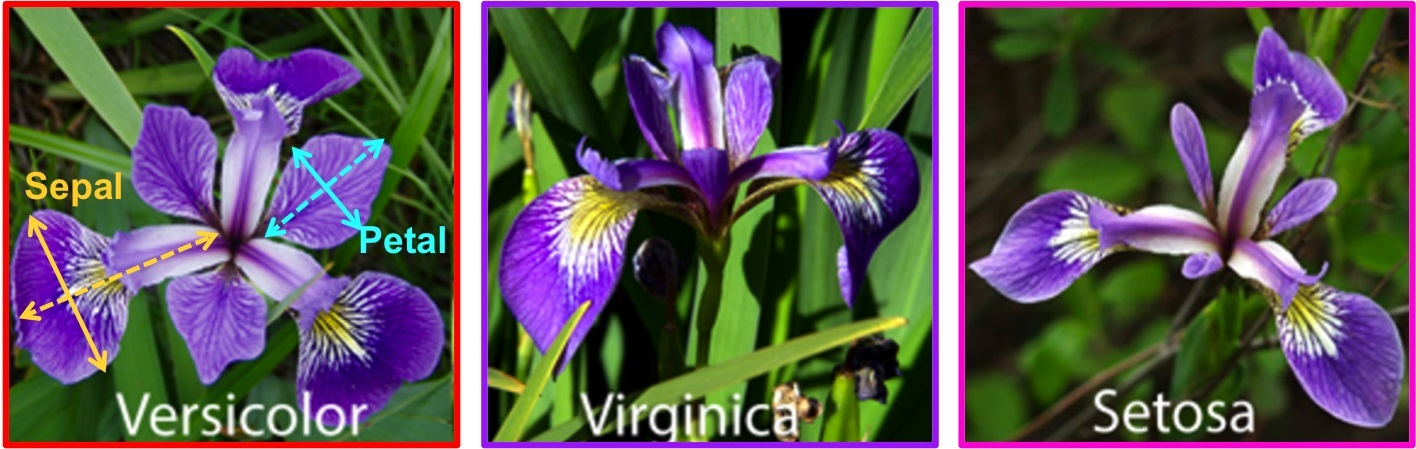
Source: http://suruchifialoke.com

In [13]:
# all rows and all columns:
df.loc[:,:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
# 2nd row and all columns
df.loc[1,:]
print(df.loc[1,:])
print("\nWe'll actually get a Series when filtering for one single row.\nThe type is:")
print(type(df.loc[1,:]))

sepal_length       4.9
sepal_width          3
petal_length       1.4
petal_width        0.2
species         setosa
Name: 1, dtype: object

We'll actually get a Series when filtering for one single row.
The type is:
<class 'pandas.core.series.Series'>


In [15]:
# 2nd and 3rd rows and all columns
df.loc[1:2,:]

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [16]:
# first 4 rows and all columns
df.loc[:3,:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [17]:
# last 4 rows and all columns
df.loc[len(df)-4:,:]

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [18]:
# a list of rows and all columns
df.loc[[1,5,3],:]

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
3,4.6,3.1,1.5,0.2,setosa


In [19]:
# column specification can be left off but not recommended:
'''  df.loc[0:2]     # is the same as
     df.loc[0:2,]    # or
     df.loc[0:2,:]
'''
print(df.loc[0:2])
print()
print(df.loc[0:2,])
print()
print(df.loc[0:2,:])

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


##### loc examples, columns:

In [20]:
# few rows and one column, specified by its label
df.loc[2:5,'species']

2    setosa
3    setosa
4    setosa
5    setosa
Name: species, dtype: object

In [21]:
# few rows and a list of columns, specified by their labels
df.loc[2:5,['species','sepal_length']]

,species,sepal_length
2,setosa,4.7
3,setosa,4.6
4,setosa,5.0
5,setosa,5.4


In [22]:
# few rows and a range of columns, specified by their labels
df.loc[2:5,'sepal_width':'petal_width']

,sepal_width,petal_length,petal_width
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
5,3.9,1.7,0.4


  ##### loc examples using boolean:

In [23]:
# filter based on species:
df.loc[df.species=='virginica',:]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


In [24]:
# further filter based on arithmetic condition:
df.loc[df.sepal_length < df.sepal_width*2,:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
100,6.3,3.3,6.0,2.5,virginica
106,4.9,2.5,4.5,1.7,virginica
136,6.3,3.4,5.6,2.4,virginica
148,6.2,3.4,5.4,2.3,virginica


In [25]:
# combine the two conditions into one complex filtering
df.loc[df.species=='virginica',:].loc[df.sepal_length < df.sepal_width*2,:]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
106,4.9,2.5,4.5,1.7,virginica
136,6.3,3.4,5.6,2.4,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [26]:
# same result when filtering in different order:
df.loc[df.sepal_length < df.sepal_width*2,:].loc[df.species=='virginica',:]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
106,4.9,2.5,4.5,1.7,virginica
136,6.3,3.4,5.6,2.4,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [27]:
# additionally filter for specific columns:
df.loc[df.species=='virginica',:].loc[df.sepal_length < df.sepal_width*2,'petal_length':'species']

,petal_length,petal_width,species
100,6.0,2.5,virginica
106,4.5,1.7,virginica
136,5.6,2.4,virginica
148,5.4,2.3,virginica
149,5.1,1.8,virginica


In [28]:
# the result is a dataframe and so can retrieve e.g. petal_width using '.petal_width'
# this approach (though working) is not preferred
df.loc[df.species=='virginica',:].loc[df.sepal_length < df.sepal_width*2,'petal_length':'species'].petal_width

100    2.5
106    1.7
136    2.4
148    2.3
149    1.8
Name: petal_width, dtype: float64

### Selection using iloc
**iloc** is a dataframe method to select rows and columns using integers

##### iloc examples, rows:

In [29]:
# all rows and all columns:
df.iloc[:,:]
# explicit form is preferred but not required, same result using below syntax: 
# df.iloc[:,]
# df.iloc[:]
# note that below won't work:
# df.iloc[,:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
# a range of rows and all columns:
df.iloc[2:5,:]

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
# a range of rows from beginning and all columns:
df.iloc[:5,:]
# or df.iloc[0:5,:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
# a range of rows till the end and all columns:
df.iloc[146:,:]

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [33]:
# a range of rows and a range columns:
df.iloc[0:2,0:2]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0


Notice the shape is (2,2), meaning 'iloc' is not inclusive for the upper bound

'loc' is inclusive, this difference can lead to unwanted results when using both 'loc' and 'iloc'

Example how it works using 'loc':

In [34]:
# notice that similar syntax using 'loc' will result in shape (3,3):
df.loc[0:2,'sepal_length':'petal_length']

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3


### loc VS iloc Summary:

| dataframe method | indexing | start position | stop position |
| --- | --- | --- | --- |
| loc | label based, labels | inclusive | inclusive
| iloc | positional, integers | inclusive | exclusive

### Explicit VS Implicit:
* Implicit: implied but not directly stated
* Explicit: directly stated, leaves no room for uncertainty

#### Always try to be as explicit as possible.

##### Example: 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **df[0:2]**
##### Questions:
* Is it using loc or iloc?
* Is the range refers to rows or columns?
* Is the range exclusive or inclusive?

##### Answer:
* iloc
* referring to rows
* exclusive to the end of the range

##### Preferred: 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **df.iloc[0:2,:]**

In [35]:
# implicit
df[0:2]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [36]:
# explicit
df.iloc[0:2,:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


### Basic Arithmetics
* addition
* substracttion
* multiplication
* division
* ...

##### Numerical examples:

In [37]:
# create two dataframes with integer values
df1 = pd.DataFrame(np.arange(12).reshape(3,4))

list1 = []
for i in range(12):
    list1.append(np.random.randint(100))
    
df2 = pd.DataFrame(np.array(list1).reshape(3,4))

In [38]:
print(df1)
print()
print(df2)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11

    0   1   2   3
0  85  90  63  36
1  55  32  83  59
2  78  15  15  53


In [39]:
# addition
df1 + df2

,0,1,2,3
0,85,91,65,39
1,59,37,89,66
2,86,24,25,64


In [40]:
# addition using the 'add' method:
df1.add(df2)

,0,1,2,3
0,85,91,65,39
1,59,37,89,66
2,86,24,25,64


In [41]:
# substraction
df1 - df2
# or
df1.subtract(df2)
# or
df1.sub(df2)

,0,1,2,3
0,-85,-89,-61,-33
1,-51,-27,-77,-52
2,-70,-6,-5,-42


In [42]:
# multiplication is element wise
df1 * df2
# or
df1.multiply(df2)
# or
df1.mul(df2)

,0,1,2,3
0,0,90,126,108
1,220,160,498,413
2,624,135,150,583


In [43]:
# division is element wise
df2 / df1
#or
df2.divide(df1)
# or
df2.div(df1)
# notice the type changed to float and 'inf' value to represent division by zero instead of getting an error

,0,1,2,3
0,inf,90.000000,31.500000,12.000000
1,13.75,6.400000,13.833333,8.428571
2,9.75,1.666667,1.500000,4.818182


##### Numerical examples with NAs:

NaN
* 'NaN' means "not a number"
* any calculations performed with NaN will result in NaN

In [44]:
# set 2nd row to NaN in df1 dataframe
df1.loc[1,:] = np.NaN
df1

,0,1,2,3
0,0.0,1.0,2.0,3.0
1,NaN,NaN,NaN,NaN
2,8.0,9.0,10.0,11.0


In [45]:
# set 2nd column to NaN in df2 dataframe
df2.loc[:,1] = np.NaN
df2

,0,1,2,3
0,85,NaN,63,36
1,55,NaN,83,59
2,78,NaN,15,53


Addition results with error(s). No breaks but reflected by NaNs:

In [46]:
df1 + df2
#or
df1.add(df2)

,0,1,2,3
0,85.0,NaN,65.0,39.0
1,NaN,NaN,NaN,NaN
2,86.0,NaN,25.0,64.0


Use fill values if it makes sense:

In [47]:
# try using 0 as a fill value when adding
df1.add(df2, fill_value=0)

,0,1,2,3
0,85.0,1.0,65.0,39.0
1,55.0,NaN,83.0,59.0
2,86.0,9.0,25.0,64.0


Notice the NaN in 2nd row 2nd column makes sense as "Not a Number" rather than 0.

##### A non-numerical example
Adding strings in dataframes:

In [48]:
# create two dataframes with character values: 

import string
import random

list_a = []
list_b = []

for i in range(12):
    list_a.append(random.choice(string.ascii_letters))
for j in range(12):
    list_b.append(random.choice(string.ascii_letters))

df_a = pd.DataFrame(np.array(list_a).reshape(3,4))
df_b = pd.DataFrame(np.array(list_b).reshape(3,4))

print('First dataframe:\n', df_a)
print()
print('Second dataframe:\n', df_b)

First dataframe:
    0  1  2  3
0  y  O  r  F
1  l  z  f  X
2  p  f  F  M

Second dataframe:
    0  1  2  3
0  X  m  z  r
1  k  k  d  P
2  r  b  f  v


In [49]:
df_a + df_b

,0,1,2,3
0,yX,Om,rz,Fr
1,lk,zk,fd,XP
2,pr,fb,Ff,Mv


In [50]:
df_a * df_b

TypeError: can't multiply sequence by non-int of type 'str'

Dataframe operations produce errors when underlying operations are not supported. 

### Descriptive Statistics
* min, max
* sum, cumsum
* mean, median
* describe

##### Examples:

In [2]:
# create two dataframes with integer values
df1 = pd.DataFrame(np.arange(12).reshape(3,4))

list1 = []
for i in range(12):
    list1.append(np.random.randint(100))
    
df2 = pd.DataFrame(np.array(list1).reshape(3,4))

print(df1)
print()
print(df2)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11

    0   1   2   3
0  12  46  22  72
1  56  22  35  35
2  79  86  26  98


In [3]:
# sum summarizes per column
df2.sum()

0    147
1    154
2     83
3    205
dtype: int64

In [4]:
# cumsum summarizes every column in a cumulative way
df2.cumsum()

,0,1,2,3
0,12,46,22,72
1,68,68,57,107
2,147,154,83,205


In [5]:
# apply sum method on the result of sum to get the total sum:
df2.sum().sum()

589

In [6]:
# get the sum by columns or rows
print("The sum by columns:")
print(df2.sum(axis=0))

print("\nThe sum by rows:")
df2.sum(axis=1)

The sum by columns:
0    147
1    154
2     83
3    205
dtype: int64

The sum by rows:


0    152
1    148
2    289
dtype: int64

In [7]:
# min (or max) retrieves the minimum (or maximum) value in a column or a in a row when a column or row is specified:
print("The minimum value in the first column:", df1.iloc[:,0].min())
print("The maximum value in the last row:    ", df1.iloc[2,:].max())

The minimum value in the first column: 0
The maximum value in the last row:     11


In [8]:
# min retrieves the minimum value in each column and returns a Series
df2.min()

0    12
1    22
2    22
3    35
dtype: int32

In [9]:
# apply min/max method on the result of min/max to get the minimum/maximum value of the whole dataframe:
print("The minimum value of the dataframe:", df2.min().min())
print("The maximum value of the dataframe:", df2.max().max())

The minimum value of the dataframe: 12
The maximum value of the dataframe: 98


In [10]:
print("\nMean:  \n", df2.mean())
print("\nMedian:\n", df2.median())


Mean:  
 0    49.000000
1    51.333333
2    27.666667
3    68.333333
dtype: float64

Median:
 0    56.0
1    46.0
2    26.0
3    72.0
dtype: float64


##### Retrieve basic statistics:

In [11]:
df2.describe()

,0,1,2,3
count,3.000000,3.000000,3.000000,3.000000
mean,30.666667,60.000000,57.333333,62.666667
std,18.339393,16.522712,4.163332,22.120880
min,10.000000,41.000000,54.000000,42.000000
25%,23.500000,54.500000,55.000000,51.000000
50%,37.000000,68.000000,56.000000,60.000000
75%,41.000000,69.500000,59.000000,73.000000
max,45.000000,71.000000,62.000000,86.000000


Using .info:

In [12]:
df2.info

<bound method DataFrame.info of     0   1   2   3
0  45  68  56  42
1  10  41  62  86
2  37  71  54  60>

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3 non-null      int32
 1   1       3 non-null      int32
 2   2       3 non-null      int32
 3   3       3 non-null      int32
dtypes: int32(4)
memory usage: 176.0 bytes


### Reading and Writing Data
* read tabular text
* read from local file
* read from web

##### Examples:

Load from web:

In [ ]:
df_web = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df_web.head()

Load from local file:

In [ ]:
df_local = pd.read_csv('testload.csv')
df_local.tail()

Load from cipboard:

In [ ]:
df_clipboard = pd.read_clipboard()
df_clipboard

Change the separator to ',' and try loading from clipboard

In [ ]:
df_test = pd.read_clipboard()

In [ ]:
df_test.shape

In [ ]:
pd.read_clipboard()

Try using a specified separator:

In [ ]:
pd.read_clipboard(sep=',')

Load specifying an index column:

In [ ]:
# first just load as is:
df_specindex = pd.read_csv('http://bit.ly/drinksbycountry')
df_specindex.head()

In [ ]:
# now specify an index column, preferably one which has unique values:
df_specindex = pd.read_csv('http://bit.ly/drinksbycountry', index_col='country')
df_specindex.head()

#### Writing data:

From clipboard to local:

In [ ]:
# load from clipboard and store in a dataframe
df_clipboard = pd.read_clipboard(sep=',')
# write locally
df_clipboard.to_csv('CapturedFromClipboard.csv', index=False)

From local to clipboard:

In [ ]:
# load from local file
df_local = pd.read_csv('CapturedFromClipboard.csv')
print('The local dataframe:\n', df_local)
# change a value
df_local.iloc[3,1] = 'Deep L.'
# copy to clipboard
df_local.to_clipboard()

Now open a text editor and paste the content of the clipboard. Notice the update in the 4th row / 2nd column:

#### Homework 9.1:
Create a data frame and perform below tasks:
- create a 5 x 7 dataframe using random numbers between 0 and 9
- derive and print another 3 x 3 dataframe from the middle of the 5 x 7 dataframe
- calculate (for the 3 x 3 data frame) the
- mean, median, mode
- sum of rows, sum of columns, cumulative sums and the total sum
- use .describe to display statistics details on both data frames

In [ ]:
# Homework 9.1 code comes here:



#### Homework 9.2:
Create a data frame and perform below tasks:
- use the list of alphabet + digits to create a 6 x 6 shape dataframe
    - "abcdefghijklmnopqrstuvwxyz0123456789"
    - every element is either a single character or a single digit
- add 'A', 'B', 'C', 'D', 'E', 'F' as index
- remove the last row and the first column
- replace the 2nd row with NaNs
- replace the 3rd columns values with 'q'
- save the result locally in csv format
- verify the saved file to make sure all transformations were applied

In [ ]:
# Homework 9.2 code comes here:



#### Homework 9.3:
Create a data frame and perform below tasks:
- Load the iris dataset from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv 
- Create 3 sets based on species 
- Create (interesting) plots comparing aspects of the three sets. Examples:
    - Number of rows per species
    - Average petal_length per species
    - Average petal_width per species
- Experiemnt using .loc and/or .iloc to find specific observations (specific rows) which are exceptional compared to the rest (per species or in all). Examples:
    - longest petal_width
    - shortest sepal_length
    - extreme petal_length / petal_width ratio

In [ ]:
# Homework 9.3 code comes here:

